In [15]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt

In [16]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size':18})

In [17]:
A = imread('../../data/other/Lenna_512x512.png')
B = np.mean(A, -1) # convert image from RGB to GrayScale

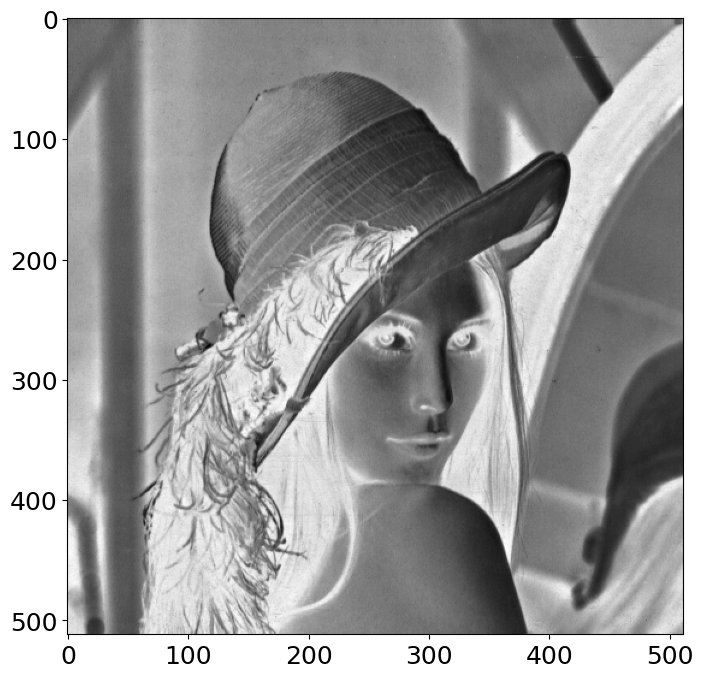

In [18]:
plt.imshow(B, cmap='gray_r')
plt.show()

## Decomposing the image

In [28]:
n = 1
w = "db1"
coeffs = pywt.wavedec2(data=B, wavelet=w, level=n)

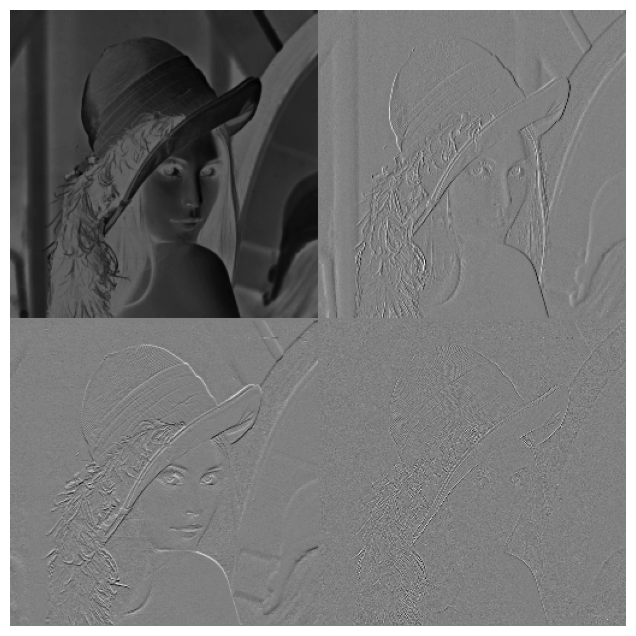

In [29]:
# normalize each coefficient array
coeffs[0] /= np.abs(coeffs[0]).max()
for detail_level in range(1, len(coeffs)):
    coeffs[detail_level] = [d / np.max(np.abs(d)) if np.max(np.abs(d)) != 0 else d for d in coeffs[detail_level]]

arr, coeff_slices = pywt.coeffs_to_array(coeffs)

plt.imshow(arr, cmap='gray_r')
plt.axis('off')
plt.show()

A lot of ray in the image described by small coefficients which gives room for compression, all things that are gray can be compressed

## Reconstructing the image

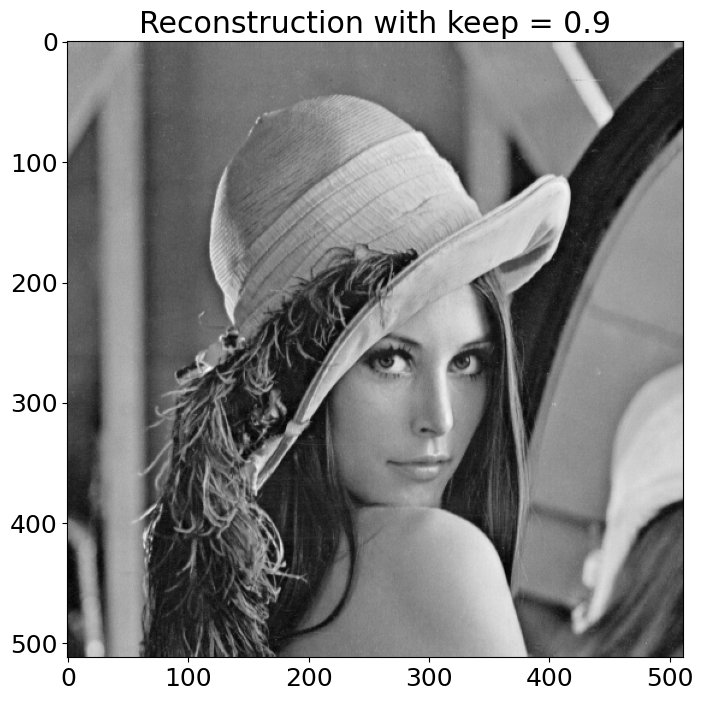

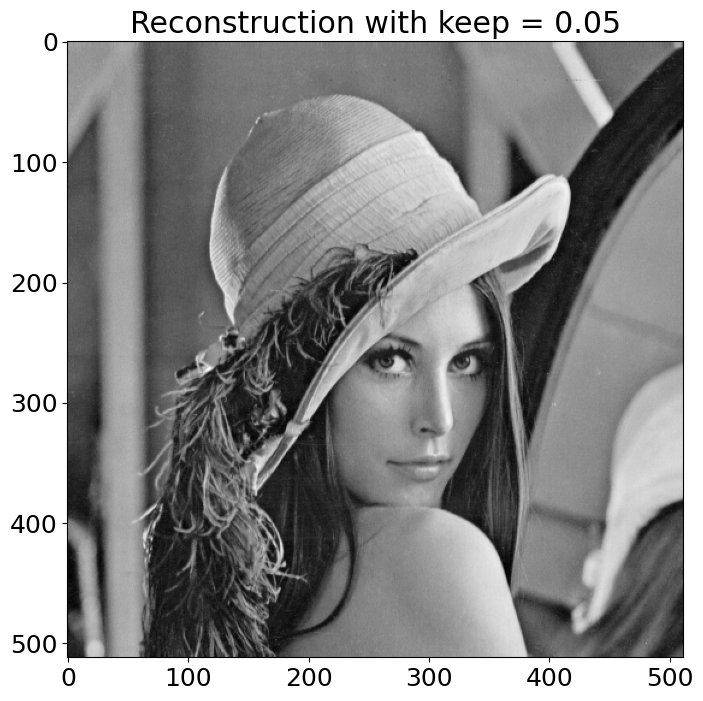

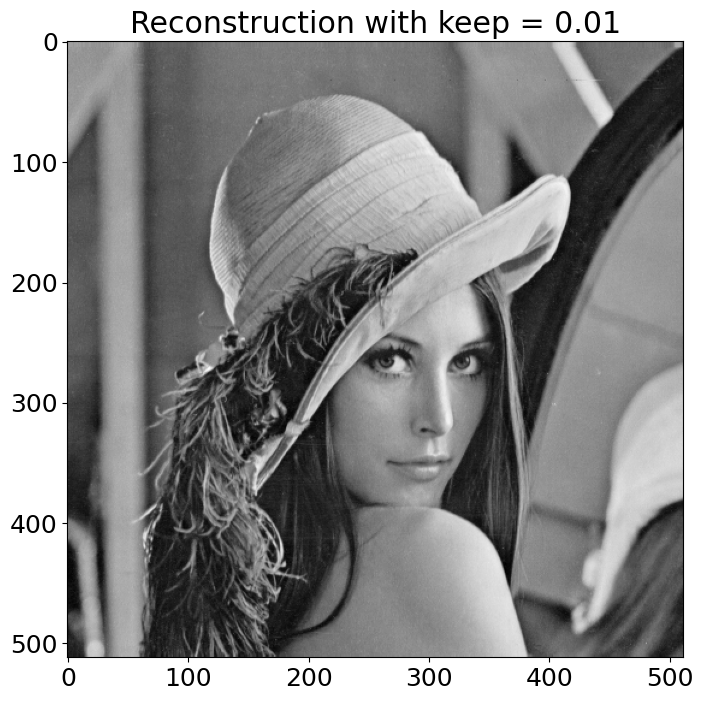

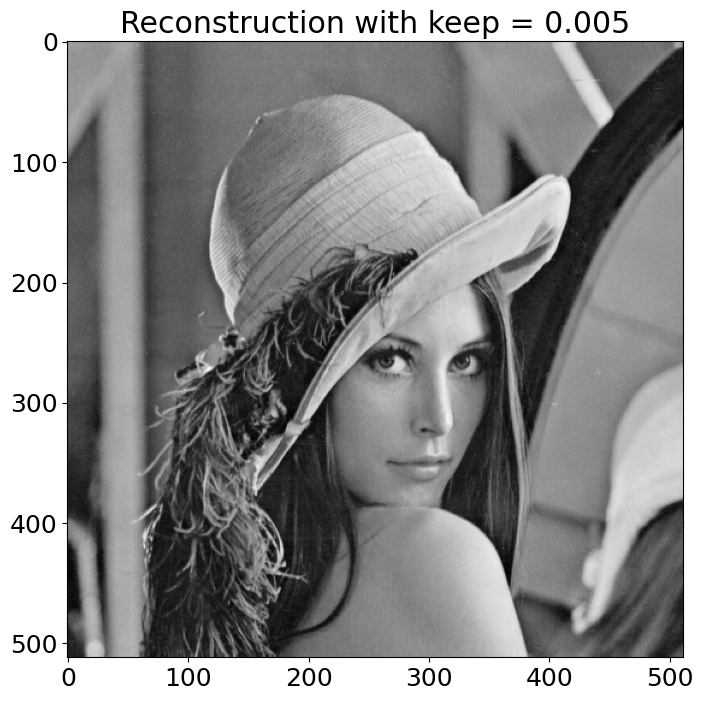

In [30]:
n = 2
w = "db1"
coeffs = pywt.wavedec2(data=B, wavelet=w, level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
Csoft = np.sort(np.abs(coeff_arr.reshape(-1)))

for keep in [0.9, 0.05, 0.01, 0.005]:
    thresh = Csoft[int(np.floor((1-keep)*len(Csoft)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind
    coeffs_filt = pywt.array_to_coeffs(coeff_arr, coeff_slices, output_format='wavedec2')

    reconstructed_image = pywt.waverec2(coeffs_filt, wavelet=w)
    reconstructed_image_uint8 = (reconstructed_image*255).astype('uint8')

    plt.figure()
    plt.title(f'Reconstruction with keep = {keep}')
    plt.imshow(reconstructed_image_uint8, cmap='gray')
    plt.show()

## Wavelet compression using pywt.dwt2 and pywt.idwt2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 511.5, 511.5, -0.5)

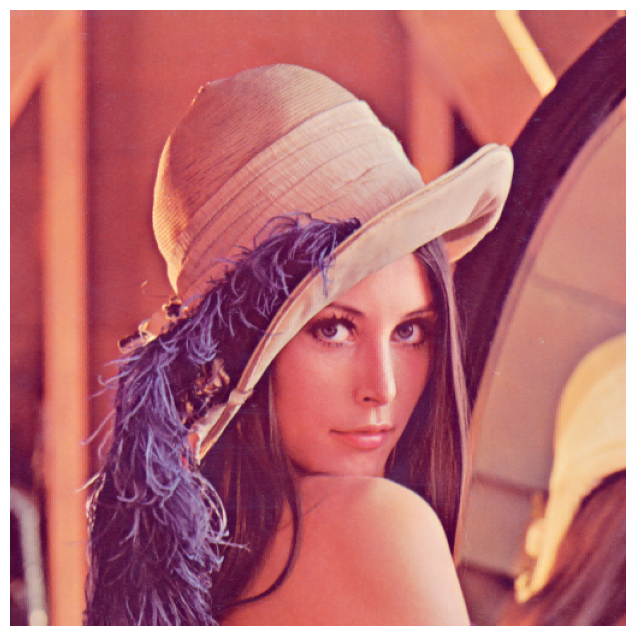

In [25]:
import numpy as np
import pywt
import cv2


image = cv2.cvtColor(A, cv2.IMREAD_GRAYSCALE)

coeffs = pywt.dwt2(image, 'haar')
cA, (cH, cV, cD) = coeffs

threshold = 0.05
cH = np.where(abs(cH) < threshold, 0, cH)
cV = np.where(abs(cV) < threshold, 0, cV)
cD = np.where(abs(cD) < threshold, 0, cD)

compressed_image = pywt.idwt2((cA, (cH, cV, cD)), 'haar')


cv2.imwrite('compressed_image.jpg', cv2.cvtColor(255*compressed_image, cv2.COLOR_RGB2BGR))

plt.imshow(compressed_image)
plt.axis('off')


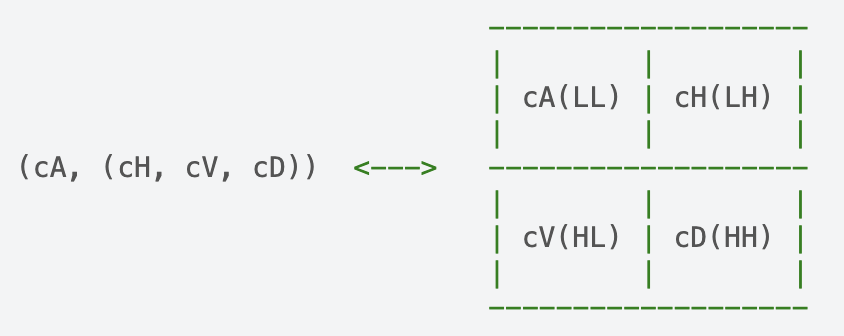

In [10]:
255*compressed_image

array([[[225.99998 , 136.99998 , 124.99998 , 254.99997 ],
        [225.99998 , 136.99998 , 124.99998 , 254.99997 ],
        [222.99997 , 136.5     , 130.5     , 254.99997 ],
        ...,
        [232.      , 148.5     , 122.49999 , 254.99997 ],
        [223.5     , 127.49999 , 100.00001 , 254.99997 ],
        [197.5     , 101.49999 , 100.00001 , 254.99997 ]],

       [[225.99998 , 136.99998 , 124.99998 , 254.99997 ],
        [225.99998 , 136.99998 , 124.99998 , 254.99997 ],
        [222.99997 , 136.5     , 130.5     , 254.99997 ],
        ...,
        [232.      , 148.5     , 122.49999 , 254.99997 ],
        [223.5     , 127.49999 , 100.00001 , 254.99997 ],
        [197.5     , 101.49999 , 100.00001 , 254.99997 ]],

       [[225.99998 , 136.99998 , 124.99998 , 254.99997 ],
        [225.99998 , 136.99998 , 124.99998 , 254.99997 ],
        [222.99997 , 136.5     , 130.5     , 254.99997 ],
        ...,
        [232.      , 148.5     , 122.49999 , 254.99997 ],
        [223.5     , 127.4999

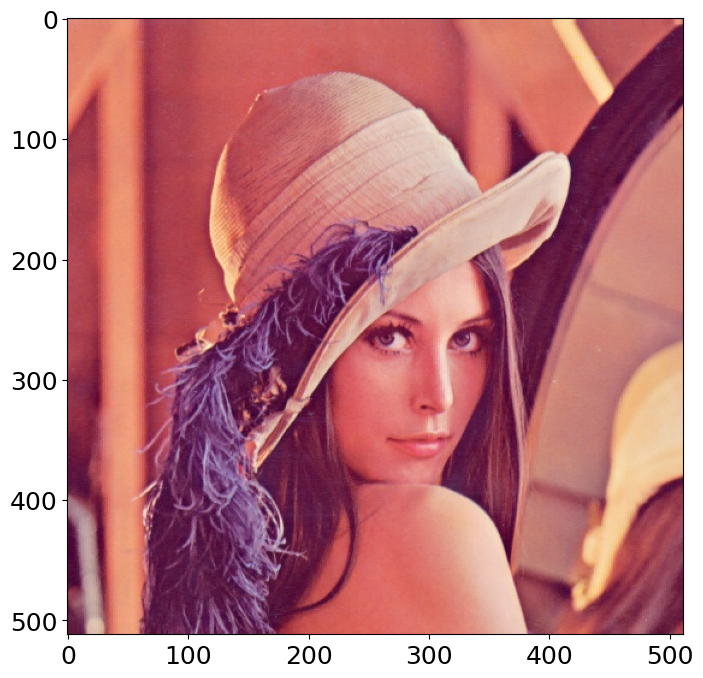

In [11]:
loaded_comressed_iamge = imread('compressed_image.jpg')
plt.imshow(loaded_comressed_iamge)

In [12]:
def PSNR(original_image:np.array, compressed_image:np.array):
    mse = np.mean((original_image - compressed_image) ** 2) 
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 10 * np.log10(max_pixel / np.sqrt(mse)) 
    return psnr 

In [13]:
PSNR(B, reconstructed_image_uint8)

2.791821535962002